<a href="https://colab.research.google.com/github/Cryslender/Active-Learning-using-Keras-Wrapper-with-CNN-/blob/main/Active_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import modAL from GitHub

In [ ]:
!pip install git+https://github.com/modAL-python/modAL.git

# Import Necessary Libraries

In [ ]:
import numpy as np

from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

# Data Collection and Pre-processing

In [ ]:
# Load the 28 x 28 digits library
X, y = fetch_openml('mnist_784', return_X_y = True, as_frame= False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [1]:
#initialize the number of unlabelled dataset to pool from training set
n_initial = 200

In [ ]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Reshape the input data to match the input shape of the model
X_train = X_train.reshape(-1, 28, 28, 1)/ 255
x_test = X_test.reshape(-1, 28, 28, 1)/ 255

#convert the lables into one-hot enconded vector
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#initialize the index to select a subset of X_train dataset
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

#select randomly the training and the testing dataset using the random index
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]

# remove the data points that were initially selected from the training data
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

# Model Design (CNN)

In [ ]:
#install package for keras wrapper from scikit learn
!pip install scikeras

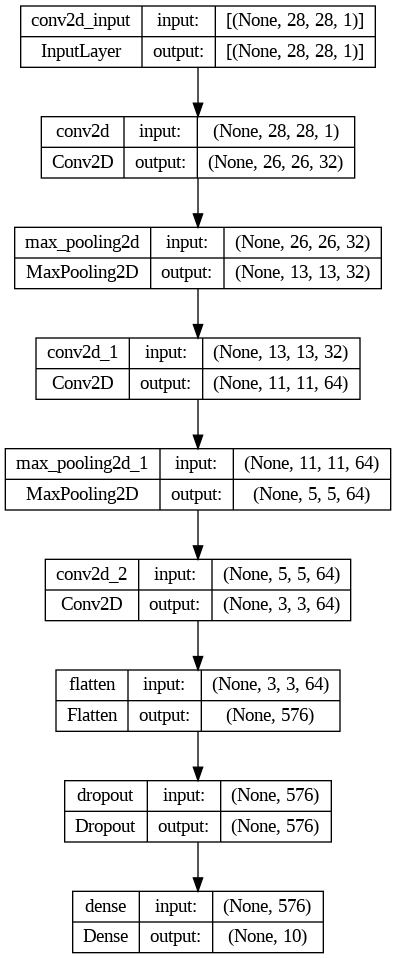

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
import keras
from tensorflow.keras.utils import plot_model
from keras import layers, models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from scikeras.wrappers import KerasClassifier

# Define a simple CNN model
def create_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        Dropout(0.5),
        layers.Dense(10, activation='softmax')  # Assuming 10 classes for digit classification
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Generate a visualization of the model
plot_model(create_cnn_model(), to_file='cnn_structure.png', show_shapes=True, show_layer_names=True)

# Active Learning

In [ ]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

# create the classifier
classifier = KerasClassifier(build_fn=create_cnn_model(), epochs=10, batch_size=32)

# Initialize the ActiveLearner with an uncertainty sampling strategy
learner = ActiveLearner(
    estimator=classifier,
    query_strategy=uncertainty_sampling,
    X_training=X_initial,
    y_training=y_initial,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


7/7 [==============================] - 1s 25ms/step - loss: 2.2743 - accuracy: 0.1500
Epoch 2/10
7/7 [==============================] - 0s 25ms/step - loss: 2.1642 - accuracy: 0.3400
Epoch 3/10
7/7 [==============================] - 0s 23ms/step - loss: 1.9634 - accuracy: 0.3900
Epoch 4/10
7/7 [==============================] - 0s 24ms/step - loss: 1.6822 - accuracy: 0.5100
Epoch 5/10
7/7 [==============================] - 0s 26ms/step - loss: 1.4258 - accuracy: 0.5550
Epoch 6/10
7/7 [==============================] - 0s 25ms/step - loss: 1.1937 - accuracy: 0.6350
Epoch 7/10
7/7 [==============================] - 0s 26ms/step - loss: 0.8997 - accuracy: 0.6800
Epoch 8/10
7/7 [==============================] - 0s 25ms/step - loss: 0.7343 - accuracy: 0.7550
Epoch 9/10
7/7 [==============================] - 0s 27ms/step - loss: 0.6833 - accuracy: 0.7650
Epoch 10/10
7/7 [==============================] - 0s 27ms/step - loss: 0.5018 - accuracy: 0.8550


In [ ]:
#set the number of time the learner will interate through unlabelled dataset pool form training dataset
n_queries = 20

1634/1634 [==============================] - 14s 8ms/step


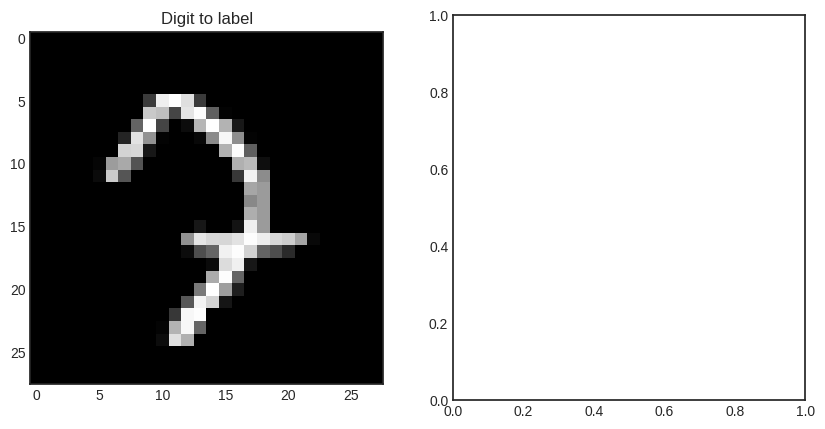

Which digit is this?
7
Epoch 1/10
1/1 [==============================] - 0s 17ms/step - loss: 5.0172 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 3.7917 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 2.7755 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 3.0027 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6506 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3250 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 13ms/step - loss: 0.3763 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


1/1 [==============================] - 0s 13ms/step - loss: 0.0317 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 10/10
547/547 [==============================] - 4s 7ms/step
0.5997142857142858


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display  # Importing display from IPython

accuracy_scores = [learner.score(X_test.reshape(-1, 28, 28, 1), y_test)]
for i in range(n_queries):
    display.clear_output(wait=True)  # Clear the output in an IPython environment

    query_idx, query_inst = learner.query(X_pool)

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(28, 28), cmap='gray')  # Assuming grayscale images
        plt.subplot(1, 2, 2)
        display.display(plt.gcf())
        plt.close('all')

    # Ask for a label for the digit being displayed with error handling
    while True:
        try:
            print("Which digit is this?")
            y_new = np.array([int(input())], dtype=int)
            break  # Exit the loop if the input is valid
        except ValueError:
            print("Invalid input. Please enter a valid integer label.")

    # Teach the model with this newly labeled input
    learner.teach(
        X=X_pool[query_idx], y=y_pool[query_idx], only_new=True,
        verbose=1
    )

    # Update the pool by removing the queried instance
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)

    #Calculate and append the new accuracy score
    accuracy = learner.score(X_test.reshape(-1, 28, 28, 1), y_test)
print(accuracy)

# The code should continue running for the desired number of queries.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Evaluate the learner
y_pred= learner.predict(X_test.reshape(-1, 28, 28, 1))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # You can change 'weighted' to 'micro', 'macro', or None as needed

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # You can change 'weighted' to 'micro', 'macro', or None as needed

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # You can change 'weighted' to 'micro', 'macro', or None as needed

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

547/547 [==============================] - 7s 13ms/step
Accuracy: 0.5997
Precision: 0.7758
Recall: 0.5997
F1-score: 0.5925


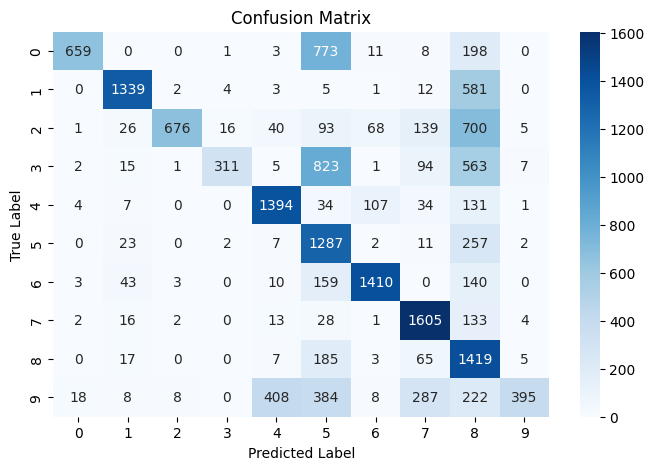

In [ ]:
import seaborn as sns
#display all the predicted imagies class and the error that model did during testing
confusion_mtx = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

# Plot
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

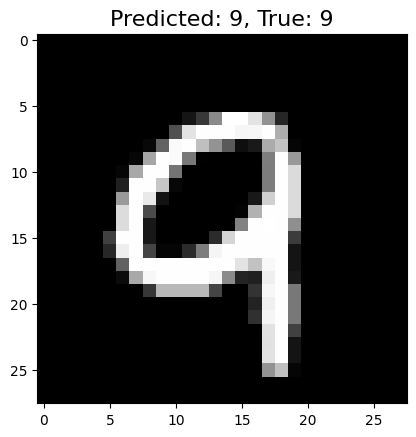

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)

#randomly find the index of image number to predict
random_idx = np.random.choice(len(X_test))

#find the value to test using random index
x_sample = X_test[random_idx]

#Find the index of the true value
y_true = np.argmax(y_test, axis=1)

#find the true value
y_sample_true = y_true[random_idx]

#predict the class of the value
y_sample_pred_class = y_pred_classes[random_idx]

#display the image
plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')